In [2]:
# Time series
# build model
# SHAP analysis - model telling you what factor has highest contr to target variable



In [3]:
import pandas as pd
import seaborn as sns

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
df = pd.read_csv('data/FRB_monthly_debt_bals.csv')

In [6]:
df.tail()

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
972,2023-08,-3.65,15.92,-10.35,4967955.59,1287912.61,3680042.98,4949641.73,3415.36,2064611.04,...,12.17,21.19,22.77,NaN,NaN,NaN,NaN,ND,ND,ND
973,2023-09,2.45,4.02,1.9,4978098.2,1292228.39,3685869.81,4960665.86,3591.38,2064949.43,...,ND,ND,ND,NaN,NaN,NaN,NaN,65.39,6.73,38587.53
974,2023-10,1.72,2.84,1.33,4985242.91,1295284.52,3689958.39,4964114.27,3591.38,2063463.1,...,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,2023-11,5.65,16.61,1.8,5008723.24,1313216.67,3695506.57,5002177.52,3591.38,2098222.35,...,12.35,21.47,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,2023-12,0.37,0.95,0.17,"5,010,283.93",1314257.94,3696025.99,5010283.93,3591.38,2097653.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Series Description',
       'Percent change of total consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total revolving consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate',
       'Total consumer credit owned and securitized, seasonally adjusted level',
       'Revolving consumer credit owned and securitized, seasonally adjusted level',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted level',
       'Total consumer credit owned and securitized, not seasonally adjusted level',
       'Total securitized consumer credit, not seasonally adjusted level',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level',
       ...
       'Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted',
       'Commercial bank interest rate on cr

In [8]:
df['Total consumer credit owned and securitized, not seasonally adjusted level'] = pd.to_numeric(df['Total consumer credit owned and securitized, not seasonally adjusted level'], errors='coerce')

In [9]:
df['credit_12m_ago'] = df['Total consumer credit owned and securitized, not seasonally adjusted level'].shift(12)
df['credit_yoy'] = (df['Total consumer credit owned and securitized, not seasonally adjusted level'] - df['credit_12m_ago']) / df['credit_12m_ago']

In [10]:
df.tail(15)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
962,2022-10,8.83,14.34,7.06,4842165.47,1185503.87,3656661.6,4821036.84,2518.58,1977623.68,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4474332.59,0.077487
963,2022-11,8.15,15.77,5.67,4875038.31,1201084.07,3673954.24,4868492.58,2748.75,2010182.07,...,20.4,NaN,NaN,NaN,NaN,ND,ND,ND,4515454.30,0.078184
964,2022-12,4.68,11.51,2.44,4894041.43,1212609.01,3681432.42,4894041.43,2973.88,2032822.9,...,ND,NaN,NaN,NaN,NaN,67.2,6.07,39407.02,4548536.16,0.075960
965,2023-01,5.42,10.3,3.81,4916136.59,1223019.11,3693117.48,4897785.77,2994.48,2013636.82,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4547714.49,0.076977
966,2023-02,2.69,3.3,2.49,4927157.05,1226382.86,3700774.19,4882667.81,3001.59,1999903.08,...,20.92,NaN,NaN,NaN,NaN,ND,ND,ND,4553256.79,0.072346
967,2023-03,4.57,13.42,1.64,4945936.43,1240096.61,3705839.82,4886478.59,3009.13,2002494.19,...,ND,NaN,NaN,NaN,NaN,66.27,6.41,39066.36,4576955.00,0.067627
968,2023-04,3.49,13.06,0.29,4960313.58,1253588.47,3706725.11,4903337.06,3010.03,2019226.57,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4607786.69,0.064142
969,2023-05,-0.21,7.58,-2.84,4959445.4,1261508.31,3697937.09,4917233.74,3010.61,2031660.95,...,22.16,NaN,NaN,NaN,NaN,ND,ND,ND,4649301.95,0.057628
970,2023-06,2.94,-0.99,4.29,4971610.2,1260463.51,3711146.69,4940746.08,3020.46,2037004.51,...,ND,NaN,NaN,NaN,NaN,65.37,6.6,38689.2,4694075.74,0.052549
971,2023-07,2.78,10.08,0.3,4983110.63,1271047.38,3712063.25,4945792.07,3213.27,2039933.26,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4714302.19,0.049104


In [11]:
 df = df.rename({'Series Description': 'Date'}, axis=1)

In [12]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,NaN,Currency,Currency,...,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency,NaN,NaN
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000.0,1000000,1000000,...,1,1,1,1,1,1,1,1,NaN,NaN
2,Currency:,USD,USD,USD,USD,USD,USD,NaN,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,NaN,NaN
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,NaN,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M,NaN,NaN
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,NaN,DTCNL_N.M,DTCTLHD_N.M,...,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M,NaN,NaN


In [13]:
df=df[5:]
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape

(972, 121)

In [15]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


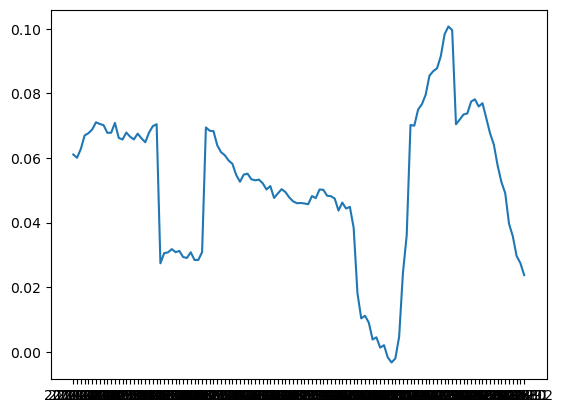

In [16]:
#Lookinga t credit since 2000

import matplotlib.pyplot as plt

mask = df[852:]

plt.plot(mask['Date'], mask['credit_yoy'])


In [17]:
df_bls = pd.read_csv('data/BLS_data.csv')
df_bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy
0,0,2023,December,306.746,3.352123,3.7,157347.0,1.980673,NaN,NaN,...,325.409,2.704844,3.289,-1.996424,139.5,-1.622003,127.596,0.080004,270.725,2.184670
1,1,2023,November,307.051,3.137271,3.7,157014.0,1.854627,NaN,NaN,...,325.172,2.949119,3.500,-9.161692,139.5,-1.483051,127.908,-0.096070,270.202,2.107125
2,2,2023,October,307.671,3.241145,3.8,156832.0,1.907120,NaN,NaN,...,325.731,3.300742,3.782,-5.826693,140.2,-1.751927,126.772,-1.819984,269.779,2.020913
3,3,2023,September,307.789,3.699698,3.8,156667.0,2.039261,NaN,NaN,...,324.704,3.692255,3.988,2.757021,141.0,-1.467505,127.343,-1.915582,269.390,1.930855
4,4,2023,August,307.026,3.665112,3.8,156421.0,2.048525,NaN,NaN,...,324.100,4.254121,3.955,-3.560107,140.3,-2.973721,128.323,-0.803172,269.199,2.318519


In [18]:
#Loading Aaran's full dataset to combine with credit yoy from df
#df_first = pd.read_csv('data/all_monthly_data_clean.csv')
#df_first.head()

In [19]:
#df_first['date'] = pd.to_datetime(df_first['month']+' '+df_first['year'].astype(str))

#df_first.set_index('date', inplace=True)
#df_first.sort_index(inplace=True)




In [20]:
#df_first.head()

In [21]:
#df.head()

In [22]:
#df.reset_index(inplace=True, drop = True)
#df.head()

In [23]:
#df = df[684:]
#df.head()

In [24]:
#df.reset_index(inplace=True)
#df.head()

In [25]:
#df = df.drop(columns = 'index')
#df.head()

In [26]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index(df['Date'], inplace=True)
#df.head()

In [27]:
#df = df.drop(columns = 'Date')
#df.head()

In [28]:
#df_first.head()

In [29]:
#plt.figure(figsize=(10, 6)) 
#plt.title('Credit Year-Over-Year')
#plt.xlabel('Year')
#plt.ylabel('Credit YoY Change')
#plt.plot(df['credit_yoy'])


#plt.show()


In [30]:
#df_first.head()

In [31]:
#Combining credit with original Aaran's df
#df_first['credit_yoy'] = df['credit_yoy']


In [32]:
#df_first.info()

In [33]:
#removing 2001
#df_first_cut = df_first[12:]

In [34]:
#plt.plot(df_first_cut['shelter_yoy'])
#plt.plot(df_first_cut['credit_yoy'])
#plt.show()


In [35]:
#df_first_cut.head()

In [36]:
#multiplyhing credit by 100
#df_first_cut['credit_yoy'] = 100* df_first_cut['credit_yoy']

In [37]:
#df_first_cut.head()

In [38]:
#df_first_cut.to_csv('data/Master_data.csv')

In [39]:
df_first_cut = pd.read_csv('data/Master_data.csv')

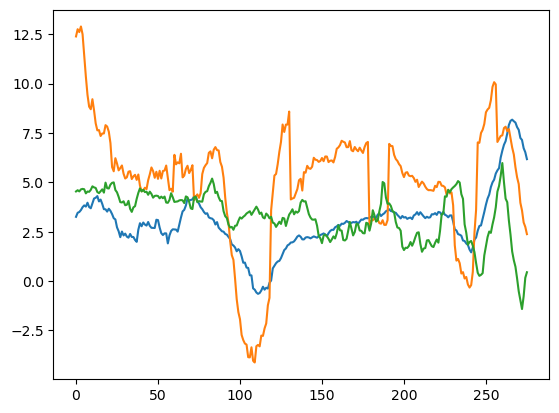

In [40]:
plt.plot(df_first_cut['shelter_yoy'])
plt.plot(df_first_cut['credit_yoy'])
plt.plot(df_first_cut['medical_care_yoy'])
plt.show()

In [41]:
df_first_cut.corr()['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                         1.000000
shelter_yoy                                                        0.520146
cpi_yoy                                                            0.448303
food_yoy                                                           0.320199
energy_yoy                                                         0.299519
mortgage_rate_30_yr                                                0.248460
gasoline_yoy                                                       0.202741
all_less_food_&_shelter_yoy                                        0.184390
imports_yoy                                                        0.164761
tax_personal_current                                               0.136099
cc_balance_total_billions                                          0.111787
hourly_earnings_yoy                                                0.108193
medical_care_yoy                                                   0.103553
new_&_used_v

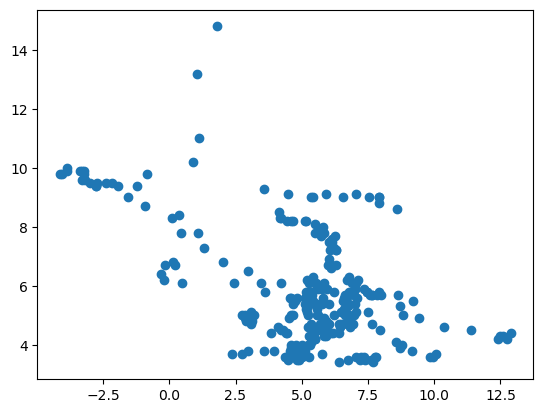

In [42]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['unemployment_rate'])

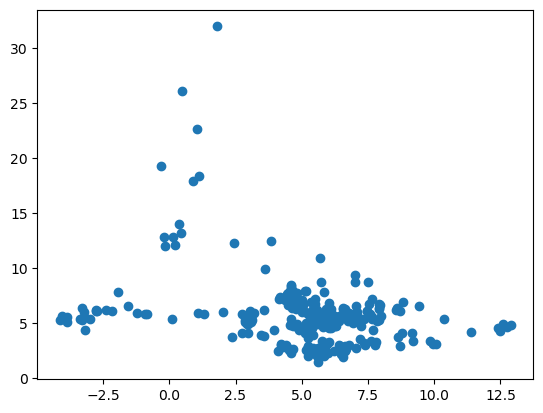

In [43]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

<AxesSubplot:xlabel='credit_yoy', ylabel='Count'>

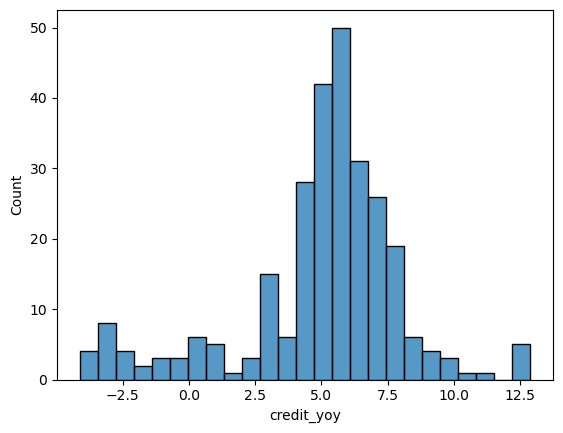

In [44]:
sns.histplot(df_first_cut['credit_yoy'])

<AxesSubplot:xlabel='personal_saving_as_a_percentage_of_disposable_personal_income', ylabel='Count'>

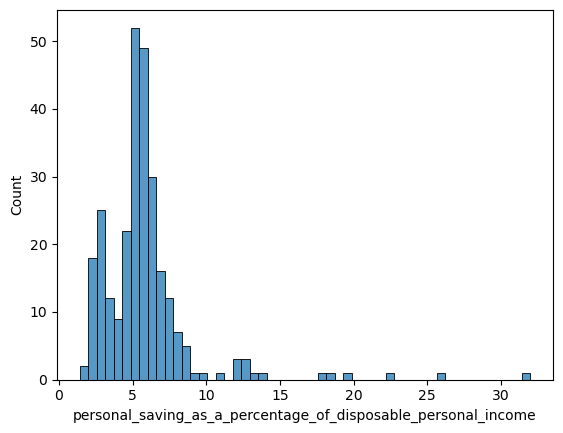

In [45]:
sns.histplot(df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

In [46]:
df_first_cut.columns

Index(['date', 'year', 'month', 'population', 'unemployment_rate',
       'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'imports_yoy',
       'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_personal_income'

In [47]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees', 'rental_income_(capital_consumption_adjusted)', 'credit_yoy', 'unemployment_rate']
    

In [48]:
df1 = df_first_cut[features]

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

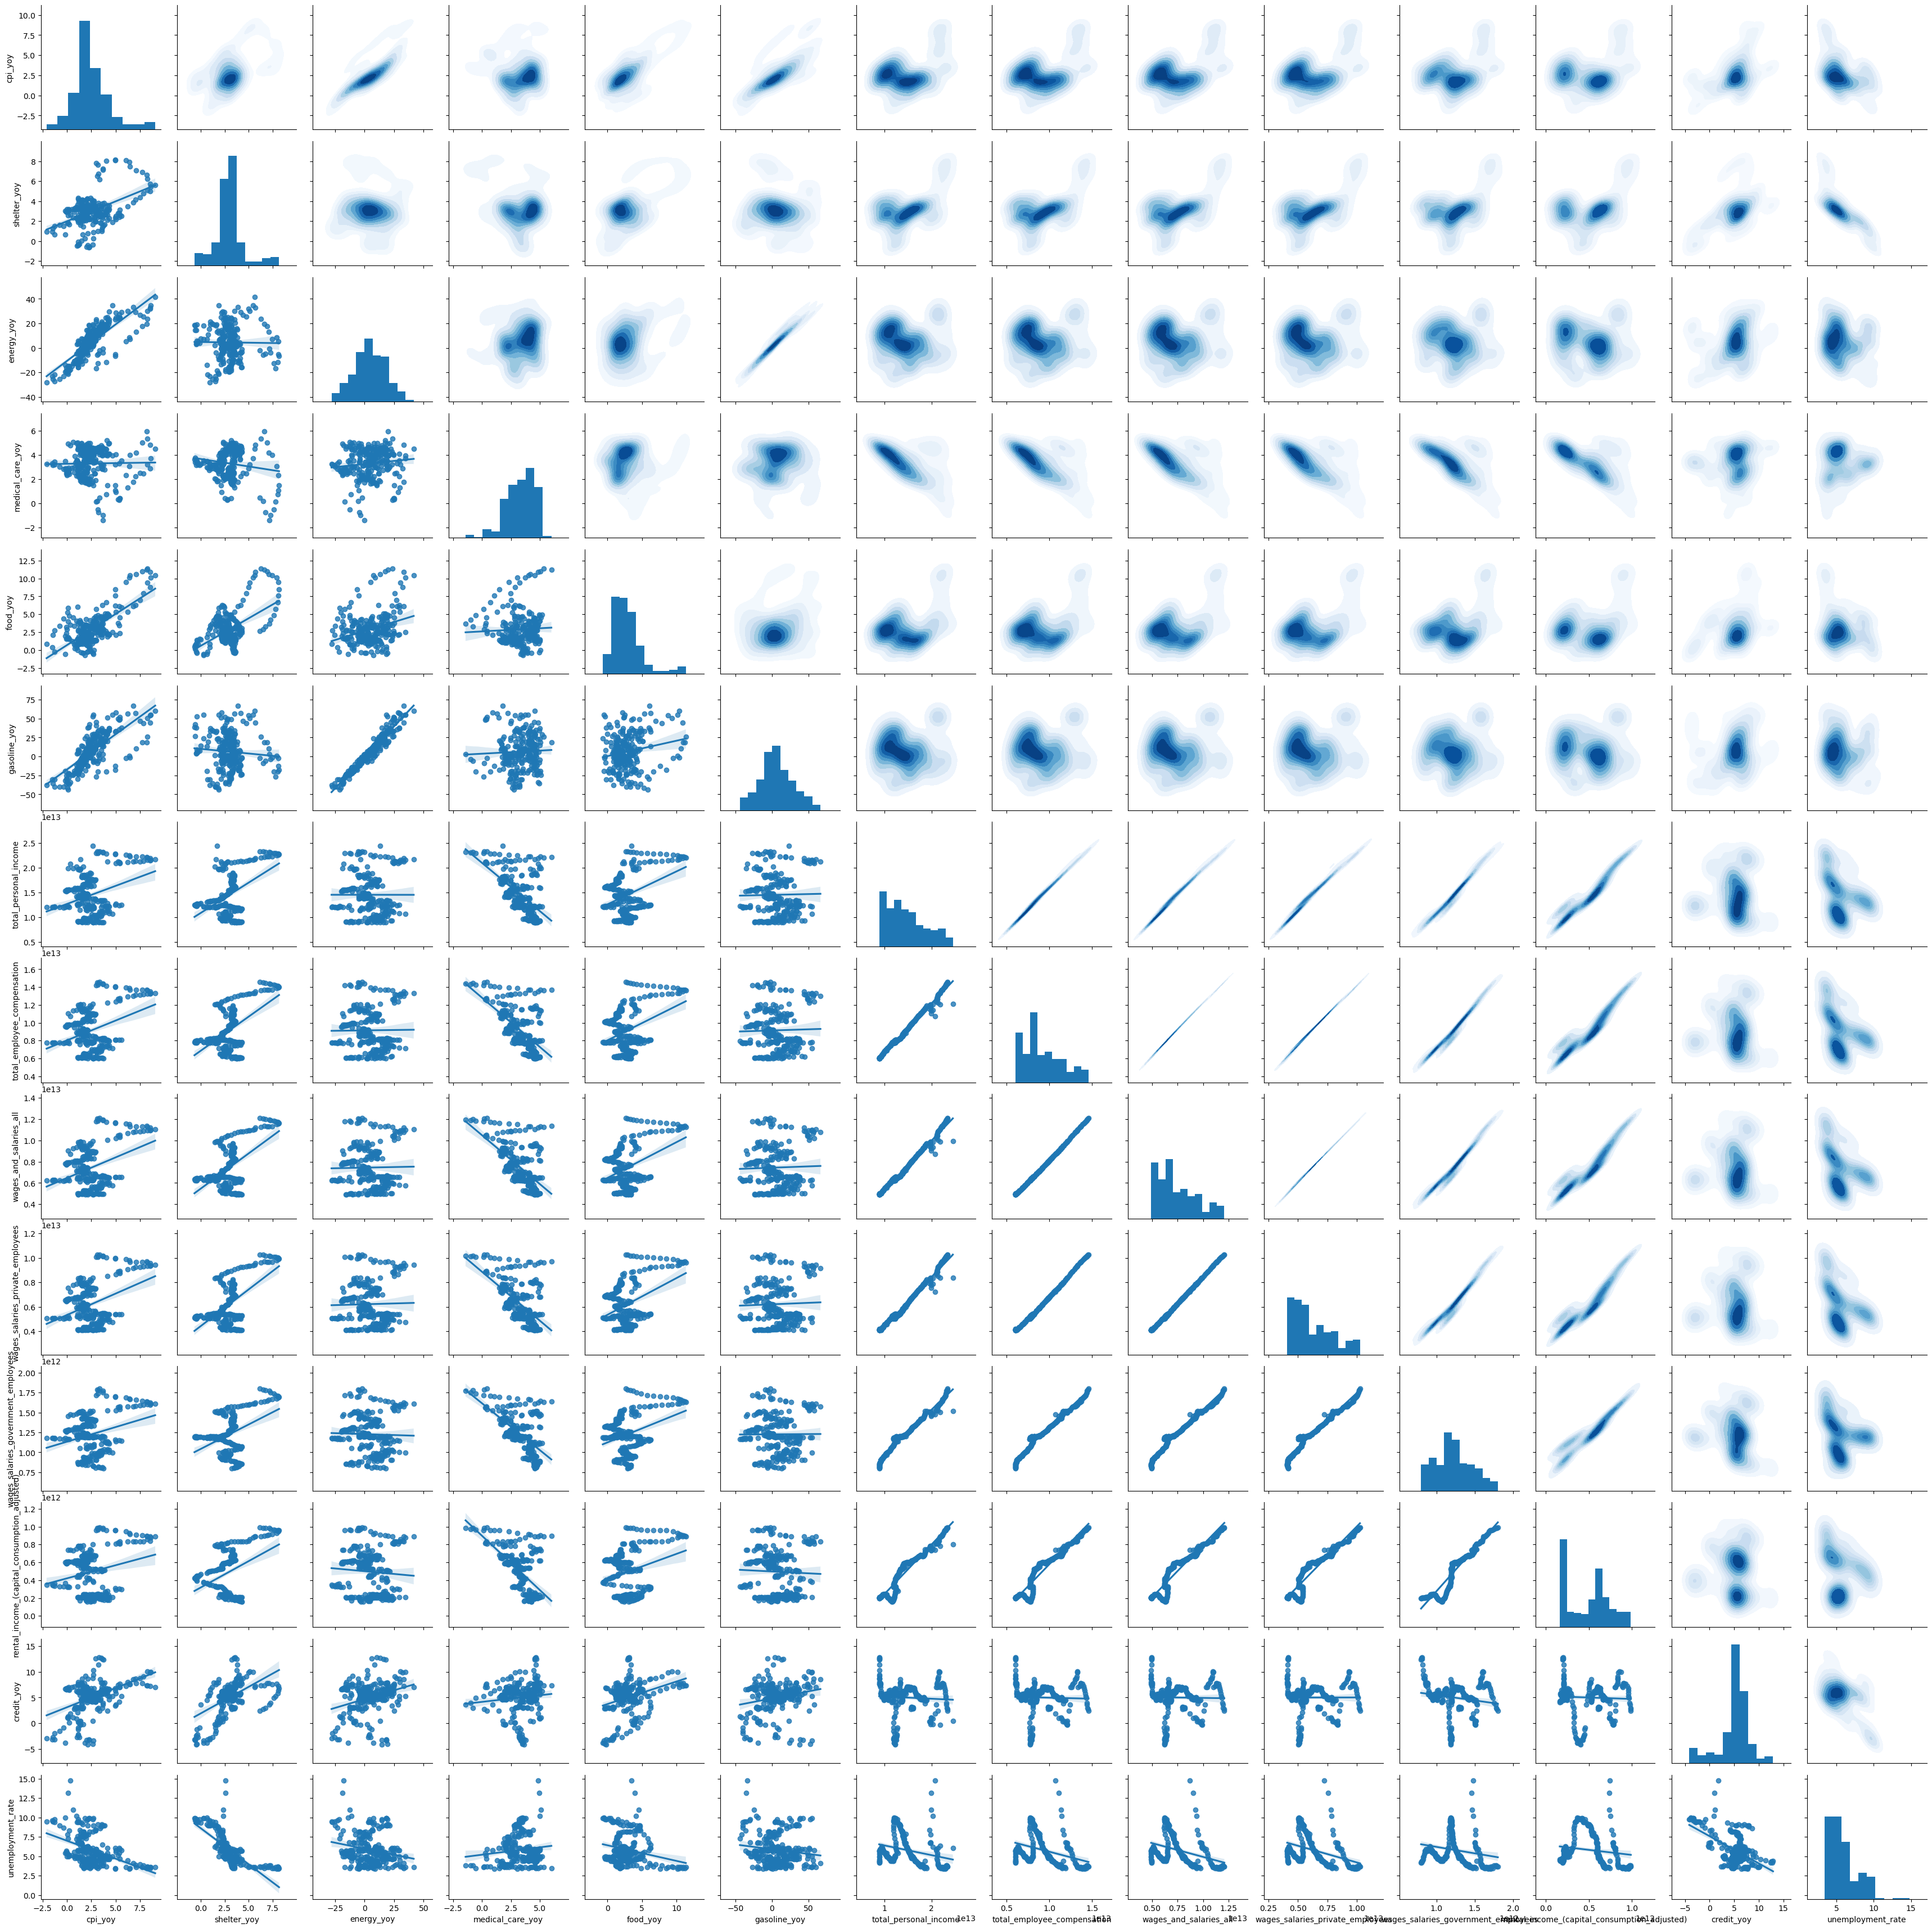

In [49]:
g = sns.PairGrid(df1)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

<AxesSubplot:>

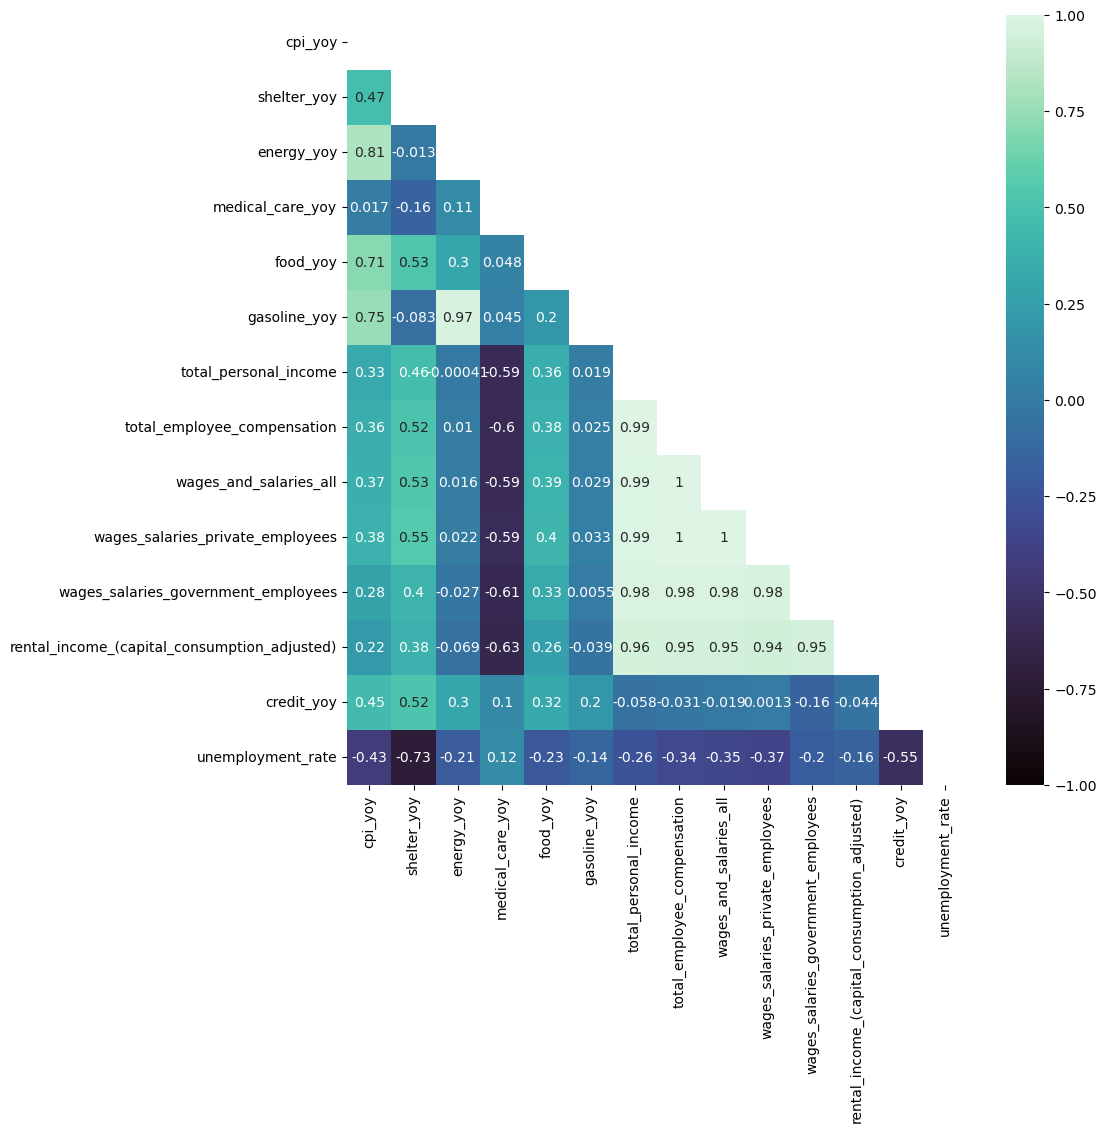

In [50]:
import numpy as np

plt.figure(figsize=(10,10))

corr = df1.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, annot = True, fmt='.2g', cmap = 'mako', vmax =1, vmin = -1 )

In [51]:
df_first_cut.head()

,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy
0,2001-01-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,...,5.118800e+10,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364
1,2001-02-01,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,...,5.152400e+10,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135
2,2001-03-01,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,...,5.189600e+10,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905
3,2001-04-01,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,...,5.212400e+10,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804
4,2001-05-01,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,...,5.246000e+10,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [53]:
df_first_cut.columns

Index(['date', 'year', 'month', 'population', 'unemployment_rate',
       'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'imports_yoy',
       'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_personal_income'

In [54]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government']
X = df_first_cut[features]
y = df_first_cut['credit_yoy']


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   cpi_yoy                                                 276 non-null    float64
 1   shelter_yoy                                             276 non-null    float64
 2   energy_yoy                                              276 non-null    float64
 3   medical_care_yoy                                        276 non-null    float64
 4   food_yoy                                                276 non-null    float64
 5   gasoline_yoy                                            276 non-null    float64
 6   new_&_used_vehicles_yoy                                 276 non-null    float64
 7   total_personal_savings                                  276 non-null    float64
 8   total_employee_compensation             

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [58]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.330e+00, tolerance: 1.386e-01
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+00, tolerance: 1.788e-01
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

0.7517976946944983

In [59]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.7739736006649419

In [60]:
gs_lr2_model.score(X_train, y_train)

0.8357033939289938

In [61]:
#Build mortgage costs
# add homelessness, foreclosure data?
#Look for polynomial, log data



In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9517222446694018

In [63]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8614060408021013

In [64]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [65]:
feature_imp.sort_values(ascending=False)

shelter_yoy                                               0.494850
cpi_yoy                                                   0.059867
social_security                                           0.059653
employer_contributions_for_government_social_insurance    0.058095
population                                                0.050378
total_personal_savings                                    0.044307
tax_other_to_government                                   0.043589
personal_interest_income                                  0.033533
new_&_used_vehicles_yoy                                   0.028308
wages_and_salaries_all                                    0.025062
total_employee_compensation                               0.019622
food_yoy                                                  0.018849
energy_yoy                                                0.017896
gasoline_yoy                                              0.017587
mortgage_rate_30_yr                                       0.01

In [66]:
df_first_cut.columns

Index(['date', 'year', 'month', 'population', 'unemployment_rate',
       'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'imports_yoy',
       'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_personal_income'

In [67]:
#Working with debt bals
debt_bals = pd.read_csv('data/NYFED_Debt_Bals.csv')

In [68]:
debt_bals.head()


,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
def convert_to_datetime(qtr_date):
    qtr_date_str = str(qtr_date)
    yr, qtr = qtr_date.split(':')
    year = '20' + yr
    quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    month = quarter_to_month[qtr]
    return pd.to_datetime(f'{year}-{month}-01').date()

In [70]:
debt_bals = debt_bals[:83]
features = ['Qtr', 'Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Student Loan', 'Other', 'Total']
debt_bals = debt_bals[features]

In [71]:
debt_bals

,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893
...,...,...,...,...,...,...,...,...
78,22:Q3,11.669,0.322,1.524,0.925,1.5740,0.4910,16.5050
79,22:Q4,11.923,0.336,1.552,0.986,1.5950,0.5070,16.8990
80,23:Q1,12.044,0.339,1.562,0.986,1.6040,0.5120,17.0470
81,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630


In [72]:
convert_to_datetime('23:Q2')

datetime.date(2023, 4, 1)

In [73]:
debt_bals['date'] = debt_bals['Qtr'].apply(convert_to_datetime)

In [74]:
debt_bals.head()

,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,date
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,2003-01-01
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,2003-04-01
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,2003-07-01
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655,2003-10-01
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,2004-01-01


In [75]:
debt_bals_1 = debt_bals.copy()

In [76]:
debt_bals_1['date'] = pd.to_datetime(debt_bals_1['date']).dt.to_period('M')

In [77]:
debt_bals_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Qtr           83 non-null     object   
 1   Mortgage      83 non-null     float64  
 2   HE Revolving  83 non-null     float64  
 3   Auto Loan     83 non-null     float64  
 4   Credit Card   83 non-null     float64  
 5   Student Loan  83 non-null     float64  
 6   Other         83 non-null     float64  
 7   Total         83 non-null     float64  
 8   date          83 non-null     period[M]
dtypes: float64(7), object(1), period[M](1)
memory usage: 6.0+ KB


In [78]:
debt_bals_1.set_index('date', inplace=True)

In [79]:
debt_bals_1 = debt_bals_1.resample('M').bfill().reset_index()

In [80]:
debt_bals_1.head()

,date,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,2003-01,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,2003-02,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2003-03,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,2003-04,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,2003-05,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551


In [81]:
df_first_cut.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 49 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   date                                                             276 non-null    object 
 1   year                                                             276 non-null    int64  
 2   month                                                            276 non-null    object 
 3   population                                                       276 non-null    float64
 4   unemployment_rate                                                276 non-null    float64
 5   hourly_earnings_yoy                                              202 non-null    float64
 6   cpi_yoy                                                          276 non-null    float64
 7   shelter_yoy                                 

In [82]:
df_first_cut_1 = df_first_cut.copy()

In [83]:
df_first_cut_1['date'] = pd.to_datetime(df_first_cut_1['date']).dt.to_period('M')

In [84]:
df_first_cut_1

,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy
0,2001-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,...,5.118800e+10,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364
1,2001-02,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,...,5.152400e+10,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135
2,2001-03,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,...,5.189600e+10,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905
3,2001-04,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,...,5.212400e+10,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804
4,2001-05,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,...,5.246000e+10,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023-08,2023,August,335431000.0,3.8,4.531443,3.665112,7.248886,-3.616573,-0.963828,...,1.311930e+11,2.759355e+12,1.814347e+12,4.704895e+12,21.19,7.0720,NaN,NaN,NaN,3.964872
272,2023-09,2023,September,335612000.0,3.8,4.517517,3.699698,7.145857,-0.450322,-1.417903,...,1.314810e+11,2.770345e+12,1.820744e+12,4.722570e+12,.,7.2000,NaN,NaN,NaN,3.577056
273,2023-10,2023,October,335773000.0,3.8,4.281346,3.241145,6.730727,-4.529580,-0.773349,...,1.317850e+11,2.762721e+12,1.824036e+12,4.718542e+12,.,7.6200,NaN,NaN,NaN,2.967773
274,2023-11,2023,November,335925000.0,3.7,4.264392,3.137271,6.526010,-5.435684,0.164800,...,1.321240e+11,2.768969e+12,1.833091e+12,4.734184e+12,21.47,7.4420,NaN,NaN,NaN,2.745921


In [85]:
merged_df = pd.merge(df_first_cut_1, debt_bals_1, on='date')

In [86]:
merged_df

,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,cc_balance_total_billions,credit_yoy,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,2003-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,4.610436,...,NaN,6.223272,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,2003-02,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,4.493581,...,NaN,5.953032,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2003-03,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,4.264392,...,NaN,5.606875,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,2003-04,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,3.997170,...,NaN,5.723911,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,2003-05,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,3.980275,...,NaN,5.854138,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,1.495750,...,NaN,6.762653,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630
243,2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,1.053688,...,837.32,6.414150,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630
244,2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,0.724042,...,NaN,5.762839,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910
245,2023-06,2023,June,335080000.0,3.6,4.658385,2.969178,7.798839,-16.738092,0.131165,...,NaN,5.254929,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910


In [87]:
#merged_df.to_csv('df_with_debt.csv')

In [88]:
merged_df.

,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,cc_balance_total_billions,credit_yoy,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,2003-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,4.610436,...,NaN,6.223272,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,2003-02,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,4.493581,...,NaN,5.953032,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2003-03,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,4.264392,...,NaN,5.606875,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,2003-04,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,3.997170,...,NaN,5.723911,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,2003-05,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,3.980275,...,NaN,5.854138,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,1.495750,...,NaN,6.762653,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630
243,2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,1.053688,...,837.32,6.414150,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630
244,2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,0.724042,...,NaN,5.762839,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910
245,2023-06,2023,June,335080000.0,3.6,4.658385,2.969178,7.798839,-16.738092,0.131165,...,NaN,5.254929,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910


In [101]:
merged_df['cc_balance_total_billions'] = merged_df['cc_balance_total_billions'].interpolate(method='linear')
merged_df['cc_bals_30d_due_percentage'] = merged_df['cc_bals_30d_due_percentage'].interpolate(method='linear')
merged_df['cc_bals_90d_due_percentage'] = merged_df['cc_bals_90d_due_percentage'].interpolate(method='linear')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 59 columns):
 #   Column                                                           Non-Null Count  Dtype    
---  ------                                                           --------------  -----    
 0   date                                                             247 non-null    period[M]
 1   year                                                             247 non-null    int64    
 2   month                                                            247 non-null    object   
 3   population                                                       247 non-null    float64  
 4   unemployment_rate                                                247 non-null    float64  
 5   hourly_earnings_yoy                                              197 non-null    float64  
 6   cpi_yoy                                                          247 non-null    float64  
 7   shelter_yoy               

In [106]:
#Building some new mortgage features

merged_df['Mortgage_servicing'] = merged_df['mortgage_rate_30_yr'] * merged_df['Mortgage']

In [111]:
merged_df.set_index('date')

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,Mortgage_servicing
date,,,,,,,,,,,,,,,,,,,,,
2003-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,4.610436,0.967008,...,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,NaN,NaN,29.236872
2003-02,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,4.493581,1.364412,...,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,NaN,NaN,29.679900
2003-03,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,4.264392,1.419648,...,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,NaN,NaN,29.184600
2003-04,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,3.997170,1.248581,...,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,NaN,NaN,29.527500
2003-05,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,3.980275,1.706485,...,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,NaN,NaN,28.423572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,1.495750,8.499364,...,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,2.753333,1.330000,78.619616
2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,1.053688,7.651208,...,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,2.760000,1.320000,76.198795
2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,0.724042,6.691542,...,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910,2.903333,1.386667,77.999500


In [114]:
#Need to convert to datetime to chart with it
merged_df['date'] = merged_df['date'].dt.to_timestamp()

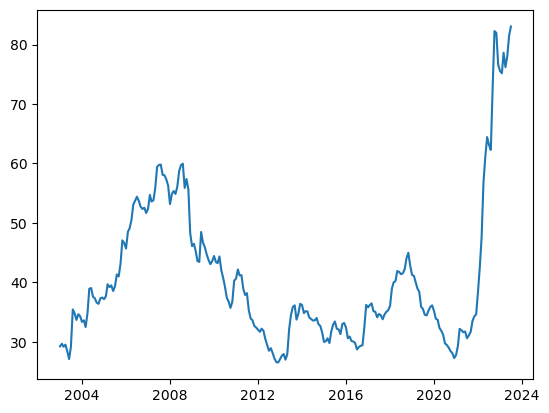

In [115]:
plt.plot(merged_df['date'],merged_df['Mortgage_servicing'])

In [ ]:
#Now dealing with the c card data

In [116]:
merged_df['cc_rate_all_ns']

0          .
1      12.26
2          .
3          .
4      12.12
       ...  
242        .
243        .
244    20.84
245        .
246        .
Name: cc_rate_all_ns, Length: 247, dtype: object

In [117]:
#coerce makes all errors NaN
merged_df['cc_rate_all_ns'] = pd.to_numeric(merged_df['cc_rate_all_ns'], errors='coerce')
merged_df['cc_rate_all_ns']

0        NaN
1      12.26
2        NaN
3        NaN
4      12.12
       ...  
242      NaN
243      NaN
244    20.84
245      NaN
246      NaN
Name: cc_rate_all_ns, Length: 247, dtype: float64

In [118]:
merged_df['cc_rate_all_ns'] = merged_df['cc_rate_all_ns'].interpolate(method='linear')
merged_df['cc_rate_all_ns']

0            NaN
1      12.260000
2      12.213333
3      12.166667
4      12.120000
         ...    
242    20.340000
243    20.590000
244    20.840000
245    20.840000
246    20.840000
Name: cc_rate_all_ns, Length: 247, dtype: float64

In [119]:
merged_df['cc_payments'] = merged_df['Credit Card'] * merged_df['cc_rate_all_ns']
merged_df['cc_payments']

0           NaN
1       8.49618
2       8.46384
3       8.43150
4       8.39916
         ...   
242    20.97054
243    21.22829
244    22.48636
245    22.48636
246    22.48636
Name: cc_payments, Length: 247, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


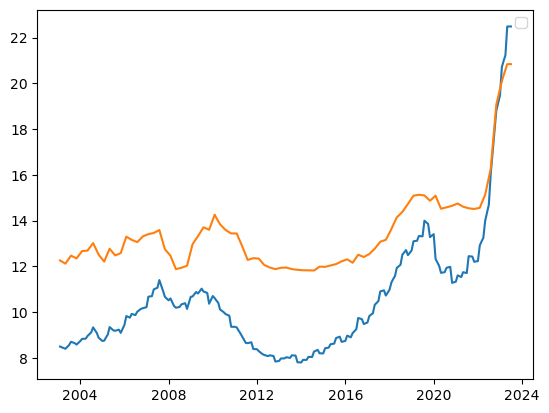

In [123]:
plt.plot(merged_df['date'],merged_df['cc_payments']) #blue
plt.plot(merged_df['date'],merged_df['cc_rate_all_ns']) #orange
plt.legend()

In [124]:
merged_df['cc_payments_yoy'] = 100*(merged_df['cc_payments'] - merged_df['cc_payments'].shift(12)) / merged_df['cc_payments'].shift(12)

In [130]:
merged_df['cc_payments_yoy'] = merged_df['cc_payments_yoy'].fillna(0)

In [131]:
merged_df['cc_payments_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    60.285403
243    60.191989
244    60.671371
245    56.734870
246    52.986648
Name: cc_payments_yoy, Length: 247, dtype: float64

In [132]:
merged_df['Mortgage_servicing_yoy'] = 100*(merged_df['Mortgage_servicing'] - merged_df['Mortgage_servicing'].shift(12)) / merged_df['Mortgage_servicing'].shift(12)

In [133]:
merged_df['Mortgage_servicing_yoy'] = merged_df['Mortgage_servicing_yoy'].fillna(0)

In [134]:
merged_df['Mortgage_servicing_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    65.492112
243    34.304782
244    27.807544
245    26.494016
246    31.475018
Name: Mortgage_servicing_yoy, Length: 247, dtype: float64

In [135]:
#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = merged_df[features]
y = merged_df['credit_yoy']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [138]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.031e-01, tolerance: 1.374e-01
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.031e-01, tolerance: 1.374e-01
  model = cd_fast.enet_coordinate_descent(


0.7972504228184485

In [139]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8093543358631455

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9042951812081819

In [141]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8386426321744962

In [142]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [143]:
feature_imp.sort_values(ascending=False)

shelter_yoy                                               0.538595
cpi_yoy                                                   0.072169
total_personal_savings                                    0.069052
cc_payments_yoy                                           0.050262
gasoline_yoy                                              0.035822
new_&_used_vehicles_yoy                                   0.032855
energy_yoy                                                0.031021
Mortgage_servicing_yoy                                    0.027304
mortgage_rate_30_yr                                       0.023778
personal_interest_income                                  0.022082
food_yoy                                                  0.021811
medical_care_yoy                                          0.014177
population                                                0.012738
wages_and_salaries_all                                    0.011007
social_security                                           0.01

<AxesSubplot:>

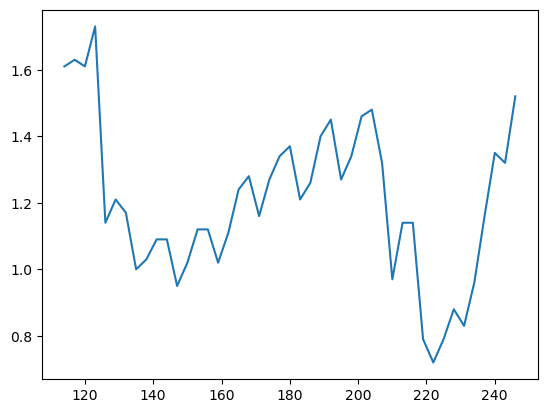

In [148]:
merged_df['cc_bals_90d_due_percentage'].plot()

In [147]:
merged_df['cc_bals_30d_due_percentage_yoy'] = 100*(merged_df['cc_bals_30d_due_percentage'] - merged_df['cc_bals_30d_due_percentage'].shift(12)) / merged_df['cc_bals_30d_due_percentage'].shift(12)
merged_df['cc_bals_30d_due_percentage_yoy'] = merged_df['cc_bals_30d_due_percentage_yoy'].fillna(0)
merged_df['cc_bals_30d_due_percentage_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    51.559633
243    53.333333
244    51.742160
245    50.328947
246    49.065421
Name: cc_bals_30d_due_percentage_yoy, Length: 247, dtype: float64

In [149]:
merged_df['cc_bals_90d_due_percentage_yoy'] = 100*(merged_df['cc_bals_90d_due_percentage'] - merged_df['cc_bals_90d_due_percentage'].shift(12)) / merged_df['cc_bals_30d_due_percentage'].shift(12)
merged_df['cc_bals_90d_due_percentage_yoy'] = merged_df['cc_bals_90d_due_percentage_yoy'].fillna(0)
merged_df['cc_bals_90d_due_percentage_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    26.605505
243    27.222222
244    26.829268
245    26.480263
246    26.168224
Name: cc_bals_90d_due_percentage_yoy, Length: 247, dtype: float64

In [151]:
#Now trying to predict 30d delinquent

#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = merged_df[features]
y = merged_df['cc_bals_30d_due_percentage_yoy']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [154]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.092e+02, tolerance: 2.677e+00
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+03, tolerance: 2.520e+00
  model = cd_fast.enet_coordinate_descent(
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

0.7071221015161353

In [155]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.7268298395073325

In [156]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9896777952010957

In [157]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9499383871715026

In [158]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [159]:
feature_imp.sort_values(ascending=False)

mortgage_rate_30_yr                                       0.242924
cc_payments_yoy                                           0.143199
population                                                0.091323
employer_contributions_for_government_social_insurance    0.088899
shelter_yoy                                               0.072162
personal_interest_income                                  0.057957
tax_other_to_government                                   0.053142
Mortgage_servicing_yoy                                    0.051271
wages_and_salaries_all                                    0.044148
total_employee_compensation                               0.040549
social_security                                           0.040090
medical_care_yoy                                          0.024585
food_yoy                                                  0.021486
cpi_yoy                                                   0.009283
total_personal_savings                                    0.00

In [ ]:
#Linear model to future periods
#PCA to create PCs
#Use PCs in 
#Cant do time series on highly correlated features


In [193]:
#Now predicting 3m ahead
merged_df['cc_bals_30d_due_percentage_yoy_6m'] = merged_df['cc_bals_30d_due_percentage_yoy'].shift(-6)
merged_df['cc_bals_30d_due_percentage_6m'] = merged_df['cc_bals_30d_due_percentage'].shift(-6)

merged_df[['cc_bals_30d_due_percentage_6m', 'cc_bals_30d_due_percentage']][-10:]

,cc_bals_30d_due_percentage_6m,cc_bals_30d_due_percentage
237,2.760000,2.480000
238,2.903333,2.566667
239,3.046667,2.653333
240,3.190000,2.740000
241,NaN,2.746667
242,NaN,2.753333
243,NaN,2.760000
244,NaN,2.903333
245,NaN,3.046667
246,NaN,3.190000


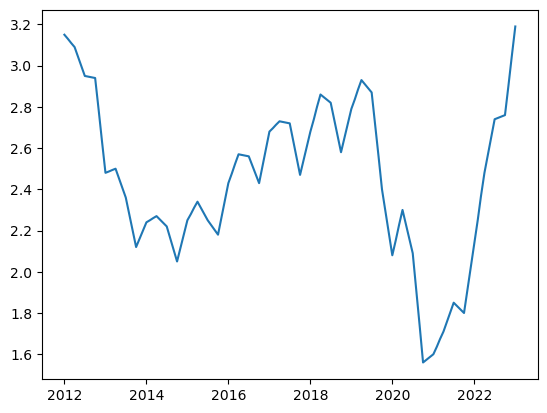

In [199]:
plt.plot(merged_df['date'], merged_df['cc_bals_30d_due_percentage_6m'])

In [207]:
#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'employer_contributions_for_government_social_insurance' , 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = merged_df[108:241][features]
y = merged_df[108:241]['cc_bals_30d_due_percentage_6m']

In [208]:
merged_df[108:241]

,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,cc_bals_90d_due_percentage,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
108,2012-01-01,2012,January,313636000.0,8.3,1.706037,2.925217,1.959370,6.125429,3.634361,...,NaN,32.052105,8.380917,-10.456611,-21.105851,0.000000,0.000000,0.000000,0.000000,3.150000
109,2012-02-01,2012,February,313811000.0,8.3,1.792742,2.871099,2.011411,6.965970,3.380883,...,NaN,31.691830,8.292480,-11.133516,-24.857233,0.000000,0.000000,0.000000,0.000000,3.130000
110,2012-03-01,2012,March,313993000.0,8.2,2.142545,2.651398,2.125057,4.570008,3.524439,...,NaN,32.213238,8.229760,-10.585970,-21.780968,0.000000,0.000000,0.000000,0.000000,3.110000
111,2012-04-01,2012,April,314176000.0,8.2,2.095155,2.302740,2.253886,0.884041,3.463406,...,NaN,31.854770,8.167040,-10.023068,-22.715312,0.000000,0.000000,0.000000,0.000000,3.090000
112,2012-05-01,2012,May,314368000.0,8.2,1.827676,1.704254,2.310301,-3.867484,3.547092,...,NaN,30.490344,8.128440,-9.043637,-21.747950,0.000000,0.000000,0.000000,0.000000,3.043333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2022-09-01,2022,September,333925000.0,3.5,5.137318,8.201670,6.606322,19.786245,5.977259,...,1.093333,72.873376,16.962487,36.379829,129.906225,41.434263,19.521912,47.134935,51.559633,2.753333
237,2022-10-01,2022,October,334071000.0,3.6,4.975923,7.745427,6.903758,17.631923,5.003761,...,1.160000,82.268700,17.882753,43.877872,145.374768,45.029240,21.637427,48.108108,53.333333,2.760000
238,2022-11-01,2022,November,334206000.0,3.6,5.089629,7.110323,7.086614,13.065612,4.172287,...,1.223333,81.959420,18.803020,54.086361,138.986023,46.110057,22.960152,49.818182,51.742160,2.903333
239,2022-12-01,2022,December,334326000.0,3.5,4.904459,6.454401,7.475966,7.310495,3.995041,...,1.286667,76.648016,19.138260,56.653637,121.298108,47.134935,24.214418,51.559633,50.328947,3.046667


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [211]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8053654531271233

In [212]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8743881898801735

In [213]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9419399957012511

In [214]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8948967735600204

In [ ]:
#Now split into bull/bear markets

In [217]:
merged_df.to_csv('data/Master_data.csv')

In [ ]:
Time series